In [1]:
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

In [2]:
data = np.array([[ 1.2, 0.7],
                 [ 0.0,-2.0],
                 [-0.3,-0.5],
                 [ 3.0, 0.1],
                 [-0.1,-1.0],
                 [-0.0, 1.1],
                 [ 2.1,-1.3],
                 [ 4.0, 1.0],
                 [ 3.1,-1.8],
                 [ 1.1,-0.1],
                 [ 1.5,-2.2],
                 [ 4.0,-1.0],
                 [-1.0, 2.0],
                 [ 2.0,1.0]])

In [3]:
labels = np.array([  1,
                     3,
                     2,
                     1,
                     2,
                     2,
                     1,
                     3,
                     2,
                     1,
                     2,
                     2,
                     3,
                     3])

In [4]:
def plot_data(data, labels):
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.scatter(data[:,0], data[:,1], c=labels, s=50,  cmap=plt.cm.Set3 ,zorder=50)
    nudge = 0.08
    for i, (X,Y) in enumerate(data):
        ax.annotate(f'{i}',(X+nudge,Y+nudge))
    ax.set_aspect('equal', 'datalim')
    plt.show()
    
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def convert_label(label):
    vec = np.zeros((3,1))
    vec[label-1]=1
    return vec

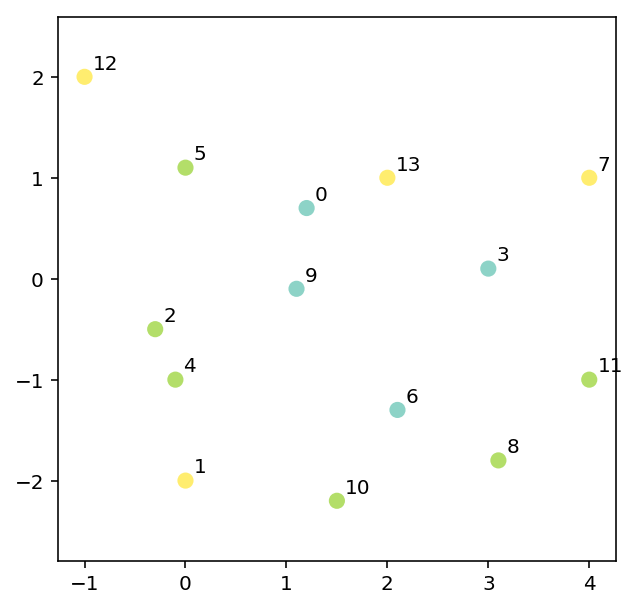

In [5]:
plot_data(data, labels)

### Task 1: Normalise data

Normalise the data by subtracting the respective mean from each data point's components and dividing each data point's coordinate by its respective standard deviation value:

Plot the normalised data set:

### Task 2: List manipulation in python

Create a numpy array of 5 numbers and store it in a variable `np_lst`:

Create a typical python list of 5 numbers and store it in a variable `lst`:

Add value $1$ to each element of both lists:

Multiply each element in both lists by 2:

Use list comprehensions to add value $1$ to python list `lst`:

Use list comprehensions to multiply each element of the python list `lst` by 5:

--------

Add another number $8$ to both lists:

Print values of `np_lst` and `lst`:

Initialise an empty python list, store it as `lst2`, append to it the number 5, and print the content:

--------

`lst3` is a list containing 8 integers:

In [ ]:
lst3 = [1, 2, 3, 4, 5, 6, 7, 8]

Return the first 3 elements of this list:

Return all the elements of this list after the third:

Return the last element of this list:

Return the last 3 elements of this list:

### Task 3: Parametric Neural Network Implementation Step by-step

Create a variable `sizes` that will store a list of numbers. Each new number incidates a new neural network layer, and the value of the number indicates the number of neurons in that layer.

Combine elements of the variable `sizes` to indicate what sizes of matrices containing weights and biases we need to instantiate:

Make a list comprehension returning the requried matrix shapes for biases:

Instantiate all the bias matrices and store them in the variable `biases`:

Use the function `zip` to print the necessary matrix shapes for weights: 

Make a list comprehension returning the required matrix shapes for weights:

Instantiate all the weight matrices and store them in the variable `weights`:

Transform the first data point into a column vector and store it in a variable `dpoint`:

Transform the label belonging to the first data point by using the function `convert_label` and store it in a variable `y`:

#### Forward pass

Forward pass equations:

$$
\mathbf{z}^{(l)}=\mathbf{w}^{(l)}\cdot \mathbf{a}^{(l-1)}+\mathbf{b}^{(l)}\\
\mathbf{a}^{(l)}
=
\sigma(\mathbf{z}^{(l)})
\
$$

Initialise two empty python lists `activations` and `weighted_sums` where we will store activations and weighted sums for all the neural network layers:

Compute the forward pass and print the result of the last layer activation. Append all the weighted sums and activations within the respective lists:

Print the last activation:

#### Cost function

Cost equations:

$$
\mathbf{TC} =\|\mathbf{a}^{(l_{final})}-\mathbf{y} \|^2
$$

Compute the cost (MSE) of the first data point for the last activation, and store it in a variable `C`:

#### Backward pass

Backward pass equations:

$$
\begin{align*}
\delta^{(l_{final})}&=2\left(\mathbf{a}^{(l_{final})}-\mathbf{y}\right)\odot \mathbf{a}^{(l_{final})} \odot \left(\mathbf{1}-\mathbf{a}^{(l_{final})}\right) \\
\delta^{(l)}&=\mathbf{a}^{(l)}\left(1-\mathbf{a}^{(l)}\right)\odot \mathbf{w^T}^{(l+1)} \cdot \mathbf{\delta}^{(l+1)} \\ \partial \mathbf{b}^{(l)}&=\delta^{(l)} \\
\partial \mathbf{W}^{(l)}&=
\delta^{(l)}\cdot\left(a^{(l-1)}\right)^T
\end{align*}
$$

Create variables `d_weights` and `d_biases` that will store partial derivatives in terms of weights and biases in all layers. These variables should have the same size as the corresponding weight and bias variables:

Compute the partial derivative of the total cost in terms of the activations of the last layer and store them in a variable `dC`:

Compute the partial derivative of the activations of the last layer in terms of the weighted sums of the last layer and store them in the variable `delta`:

Compute the biases of the last layer and store them in the variable `d_biases`:

Compute the weights of the last layer and store them in the variable `d_weights`:

Instantiate the variable `no_layers`, and in it store the number of the layers of the network. Use it to update the rest of the weights and biases:

Initialise the variable `step_size` with a small number, and use it to update the weights and biases:

Calculate the forward pass again:

Compute the cost, store it in a variable `C_new`, and compare it with the old cost:

### Task 4: Implement the Flexible Neural Network Algorithm

### Task 5:

Apply the functions `create_meshgrid` and `plot_neural_simple` to visualise the results of the classification. Add the necessary code to the function `plot_neural_simple` where marked:

In [ ]:
def create_meshgrid(data):
    h = 0.02
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return (xx,yy,np.ones(xx.shape))

def plot_neural_simple(weights, biases, grid, data, labels, epoch, accuracy):
    nudge = 0.06
    xx,yy,Z = grid
    
    for i in range(xx.shape[0]): # row
        for j in range(yy.shape[1]): #column
            dpoint = np.array([xx[i][j], yy[i][j]]).reshape(2,1)
            # compute the score
            Z[i][j] = score
            
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    plt.title(f'accuracy at the epoch {epoch}: {accuracy}')
    ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
    ax.scatter(data[:, 0], data[:, 1], c=labels, s=50,  cmap=plt.cm.Set3,zorder=50)
    ax.set_aspect('equal')
    for i in range(data.shape[0]):
        d = data[i]
        ax.annotate(f'{i}',(d[0]+nudge,d[1]+nudge))
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()